# Rejection Sampling

In this preliminary code, through *rejection sampling*, I will sample a PDF (the *target distribution*, $\frac{e^{-x^2/2}}{2\pi}$) using a *proposal distribution* ($e^{-|x|}$).

In [103]:
import numpy as np
import matplotlib.pyplot as plt

- Definition of the *target distribution* and of the *proposal distribution*
- Plot of the target and proposal distributions in a specific range of x values

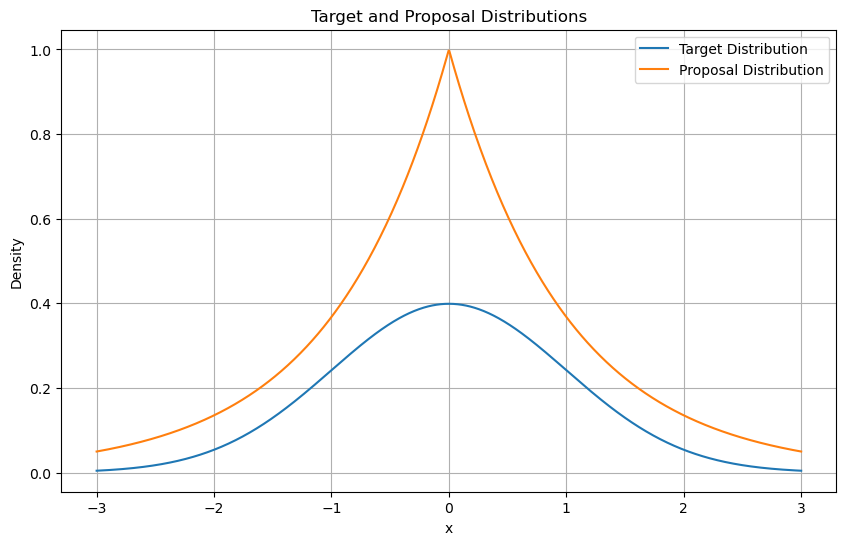

In [104]:
#target distribution (PDF)
def target_distribution(x):
    return np.exp(-x**2/2) / np.sqrt(2*np.pi)

#proposal distribution (PDF)
def proposal_distribution(x):
    return np.exp(-abs(x))

#range of x values
x_values=np.linspace(-3,3,1000)

#plot of the target and proposal distributions
plt.figure(figsize=(10,6))
plt.plot(x_values,target_distribution(x_values),label='Target Distribution')
plt.plot(x_values,proposal_distribution(x_values),label='Proposal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target and Proposal Distributions')
plt.legend()
plt.grid(True)
plt.show()

**Rejection algorithm**

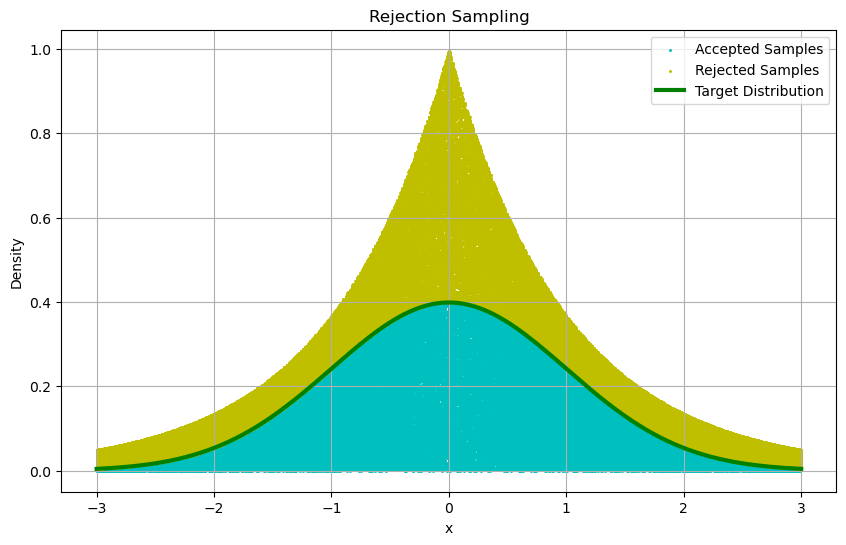

In [105]:
#maximum of the target distribution, used as the upper bound for the proposal distribution
M=max(target_distribution(x_values))

#arrays with accepted values
X=[]
Y=[]
#arrays with rejected values
X_rej=[]
Y_rej=[]
#rejection sampling
def rejection_sampling(n_samples):
    samples=[]
    accepted=0
    while accepted < n_samples:
        x=np.random.uniform(-3,3)  #sample from the proposal distribution
        u=np.random.uniform(0,proposal_distribution(x))  #sample from a uniform distribution for acceptance/rejection
        if u<target_distribution(x):  #acceptance condition
            samples.append(x)
            accepted+=1
            X.append(x)
            Y.append(u)
        else:
            X_rej.append(x)
            Y_rej.append(u)
    return samples

#number of samples to generate
n_samples=100000

#generate samples using rejection sampling
samples=rejection_sampling(n_samples)

#plot of the generated samples along with the target distribution
plt.figure(figsize=(10,6))
plt.scatter(X,Y,marker='.',color='c',s=5,label='Accepted Samples')
plt.scatter(X_rej,Y_rej,marker='.',color='y',s=5,label='Rejected Samples')
plt.plot(x_values,target_distribution(x_values),color='g',linewidth=3,label='Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling')
plt.legend()
plt.grid(True)
plt.show()

Test of the *efficiency*, computed as the number of accepted points over the total number of generated points.

In [106]:
efficiency=len(Y)/(len(Y)+len(Y_rej))
print("The efficiency is",efficiency)

The efficiency is 0.45039364404489524
